# Introduction To Music Recommender System  
![Music](https://i.giphy.com/media/3o72EX5QZ9N9d51dqo/giphy.webp)

As online music streaming becomes the dominant medium for people to listen to their favorite songs, music streaming services are now able to collect large amounts of data on the listening habits of their customers. These streaming services, like Spotify, Apple Music or Pandora, are using this data to provide recommendations to their listeners. These music recommendation systems are part of a broader class of recommender systems, which filter information to predict a user’s preferences when it comes to a certain item. Think Netflix movie recommendations or Pandora radio. This great Wikipedia article on the topic splits recommender systems into two classes, which will also apply to music specific recommender systems. These two classes, or approaches, to recommender systems are Collaborative Filtering and Content Based Filtering.

## Collaborative Filtering  

The collaborative filtering approach to recommendation algorithms involves collecting a “large amount of information on users’ behaviors, activities or preferences and predicting what users will like based on their similarity to other users”. A key point to be made about this method is that the item itself, or its features, that is being recommended is not being analyzed. Rather, it is making the assumption that previous information in a user’s history about how they agree with other users (for instance User A liked Movie A and User B liked Movie A, so they will have similar interests), will be predictive in determining whether or not they will enjoy a certain item. Data collection under this approach includes both explicit data collection, like asking a user to rate an item, and implicit data collection, like keeping records on how often and for how long a user views an item. One popular machine learning technique used in this sort of recommender system is the k-nearest neighbor approach. One of the major issues with the collaborative filtering approach is the so called “cold start problem”, in that the system need a large amount of data to make accurate recommendations.
### Example:

Last.fm creates a “station” of recommended songs by observing what bands and individual tracks the user has listened to on a regular basis and comparing those against the listening behavior of other users. Last.fm will play tracks that do not appear in the user’s library, but are often played by other users with similar interests. As this approach leverages the behavior of users, it is an example of a collaborative filtering technique.
## Content-Based Filtering

The content-based filtering approach differs from the the collaborative filtering approach as it filters based on an analysis of both the item being recommended and the user. Content-based filtering closely examines the actual item to determine which features are most important in making recommendations and how those features interact with the user’s preferences. Data collection can be much more complicated in content-based filtering as it is very difficult to select which features of an item will be important in creating some sort of predictive model (we will see that this is a major hurdle when it comes to music recommendation systems). Machine learning techniques such as naive Bayesian classifiers and cluster analysis are used to determine which features of an item can be used to classify it.
### Example:

Pandora uses the properties of a song or artist (a subset of the 400 attributes provided by the Music Genome Project) to seed a “station” that plays music with similar properties. User feedback is used to refine the station’s results, deemphasizing certain attributes when a user “dislikes” a particular song and emphasizing other attributes when a user “likes” a song. This is an example of a content-based approach.
## Hybrid Systems  

Hybrid recommender systems simply refer to systems that use a combination of both collaborative filtering and content-based filtering.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive/MyDrive/musicdata/kaggle'


/content/drive/MyDrive/musicdata/kaggle


In [7]:
ls

kaggle_songs.txt                        ratings3.csv
kaggle_users.txt                        ratings.csv
kaggle_visible_evaluation_triplets.txt  ratings_tsv.csv
MSDChallengeGettingstarted.pdf          taste_profile_song_to_tracks.txt
rating.csv                              unique_tracks.txt
ratings2.csv


In [8]:
!pip install surprise
!pip install csv2tsv


     |████████████████████████████████| 11.8MB 235kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617668 sha256=a01effd5a40df1afc74c5e26f6abd40e068ad50d7a9bdcd740c75725d3d3f77c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV


**VISIBLE EVALUTION TRIPLETS DATA**

In [10]:
triplets=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
triplets.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


**DATA DESCRIPTION**

In [11]:
triplets.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [12]:
triplets.shape

(1450933, 3)

In [13]:
triplets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


**NULL and DUPLICATE VALUES**

In [14]:
triplets.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [15]:
sum(triplets.duplicated())

0

**UNIQUE TRACK DATA**

In [16]:
tracks_df=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
tracks_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [17]:
tracks_df.shape

(1000000, 4)

In [18]:
tracks_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


**NULL AND DUPLICATE VALUES**

In [19]:
print("Number of null values \n{}.".format(tracks_df.isnull().sum()))

Number of null values 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64.


In [20]:
print("Number of duplicate values {}".format(sum(tracks_df.duplicated())))

Number of duplicate values 0


In [21]:
detail_df=tracks_df.dropna()

In [22]:
detail_df.shape

(999985, 4)

In [23]:
print("Number of Null values are \n{}".format(tracks_df.isnull().sum()))

Number of Null values are 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64


#**MERGING DATAFRAMES**

In [24]:
song_df=pd.merge(triplets, tracks_df.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()


,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [25]:
song_df.shape

(1450933, 6)

#**Basic Statistics**

In [26]:
print('Total Data Points',song_df.shape[0])
print('Total NO of users',song_df['user_id'].unique().shape[0])
print('Total number of songs',song_df['song_id'].unique().shape[0])
print('Total number of Tracks',song_df['track_id'].unique().shape[0])


Total Data Points 1450933
Total NO of users 110000
Total number of songs 163206
Total number of Tracks 163206


In [27]:
print('Number of unique release',song_df['release'].unique().shape[0])
print('Number of unique artists',song_df['artist_name'].unique().shape[0])

Number of unique release 137623
Number of unique artists 28361


In [28]:
song_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


# Distribution of Frequency column

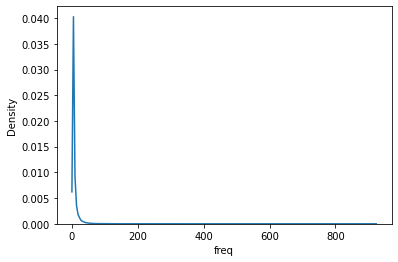

In [29]:
sns.kdeplot(data=song_df, x="freq")

# Number of songs listened per user

In [30]:
#groupby code
#using user_id,song_id
SPU=song_df.loc[:, ['user_id', 'song_id']]
songs_per_user=SPU.groupby('user_id').count()


In [31]:
songs_per_user

,song_id
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,9
00014a76ed063e1a749171a253bca9d9a0ff1782,11
00015189668691680bb1a2e58afde1541ec92ced,17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
00020fcd8b01986a6a85b896ccde6c49f35142ad,32
...,...
fffdef71f13352e9cff769f1d96f5ccf90f8955e,7
fffe29116f96c97b47a5dabdd406784ad0ba6f30,6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17,23


In [32]:
songs_per_user.sort_values(by='song_id').head()

,song_id
user_id,
336c306c5df497a9cb4067c14d5b840ba1a1e272,5
47b83637c7726c40218552445e1dc9b906f0ad6d,5
5519a61514f2248435a70afad322568c1a1173eb,5
ae7a9eaf03f35908b8ffc420241f99e9c6057bf2,5
18cb5d68334667324a9bac0a66f6579f34f43a31,5


In [33]:
songs_per_user.sort_values(by='song_id').tail()

,song_id
user_id,
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
d30e18323f15426c3cdc8585252ed34459916f51,52
7d90be8dfdbde170f036ce8a4b915440137cb11c,53


In [34]:
songs_per_user.describe()

,song_id
count,110000.000000
mean,13.190300
std,8.070827
min,5.000000
25%,7.000000
50%,11.000000
75%,17.000000
max,53.000000


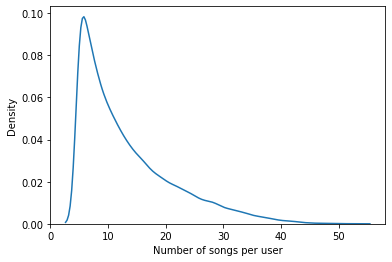

In [35]:
plt.xlabel('Number of songs per user')
sns.kdeplot(songs_per_user['song_id'])
plt.show()

# Analysis of popular artist

In [36]:
#group by
#artistname and userid
AP=song_df.loc[:, ['artist_name','freq', 'user_id']]

artist_popularity=AP.groupby('artist_name').count()



In [37]:
artist_popularity.sort_values(by='freq').head()

,freq,user_id
artist_name,,
Özlem Tekin,1,1
Chris Connelly and the Bells,1,1
Mad Professor / Mafia & Fluxy,1,1
Maddox Brothers & Rose,1,1
Madreblu,1,1


In [38]:
artist_popularity.sort_values(by='freq').tail()

,freq,user_id
artist_name,,
Jack Johnson,6784,6784
Justin Bieber,7669,7669
Florence + The Machine,8213,8213
Kings Of Leon,8514,8514
Coldplay,12279,12279


In [39]:
# looking at cold play releases
song_df[song_df['artist_name']=='Coldplay']['release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [40]:
# looking at justin beiber releases
song_df[song_df['artist_name']=='Justin Bieber']['release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [41]:
sorted_artist_popularity=artist_popularity.sort_values(by='freq',ascending=False)

Text(0.5, 1.0, 'popularity and artist')

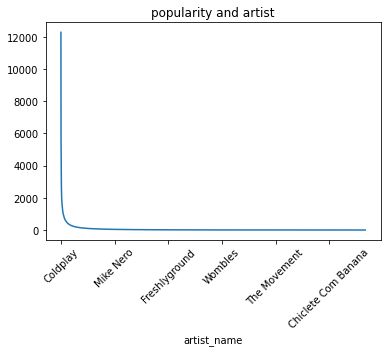

In [42]:
# plotting of popularity and artist

sorted_artist_popularity['freq'].plot.line()
plt.xticks(rotation=45)
plt.title('popularity and artist')

# Analysis of popularity song

In [43]:
# using release and userid
SP=song_df.loc[:, [ 'release','freq']]
song_popularity=SP.groupby('release').count()

In [44]:
song_popularity.sort_values(by='freq',ascending=True).head()

,freq
release,
Ef Ég Hefði Aldrei...,1
Making Love,1
Making Friends and Acquaintances,1
Making Flippy Floppy,1
Making Dens,1


In [45]:
song_popularity.sort_values(by='freq').tail()

,freq
release,
Revelry,3672
Dog Days Are Over (Radio Edit),3780
You're The One,4270
Undo,4483
Sehr kosmisch,5043


In [46]:
sorted_song_popularity=song_popularity.sort_values(by='freq',ascending=False)

In [47]:
# plot betweeen popularity and song

Text(0.5, 1.0, 'popularity and song')

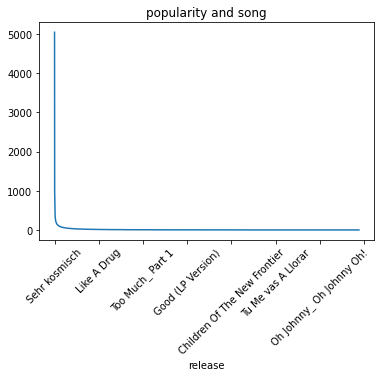

In [48]:
sorted_song_popularity['freq'].plot.line()
plt.xticks(rotation=45)
plt.title('popularity and song')

In [49]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

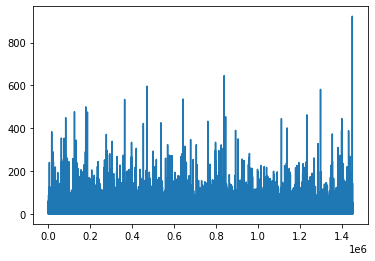

In [50]:
plt.plot(song_df.freq.values)


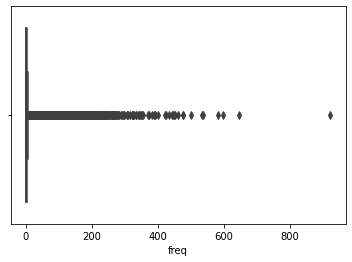

In [51]:
sns.boxplot(song_df['freq'])

In [52]:
repeated=song_df.groupby(['freq'])['song_id'].value_counts()

In [53]:
repeated

freq  song_id           
1     SOFRQTD12A81C233C0    2149
      SOAXGDH12A8C13F8A1    1693
      SOAUWYT12A81C206F1    1597
      SONYKOW12AB01849C9    1517
      SOSXLTC12AF72A7F54    1516
                            ... 
537   SOFVLYV12A8C145D8F       1
582   SONGOJV12AF729AEBD       1
597   SOAOXTG12A67021AA7       1
646   SOPMHHE12AB01845F6       1
923   SOXTUWG12AB018A2E2       1
Name: song_id, Length: 406254, dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text major ticklabel objects>)

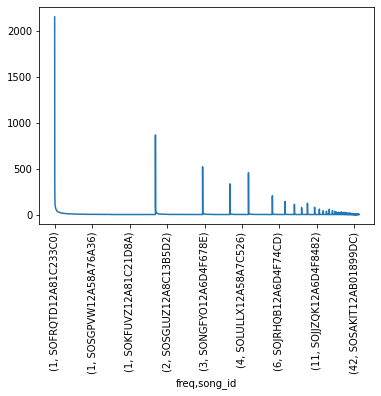

In [54]:
repeated.plot.line()
plt.xticks(rotation=90)

In [55]:
repeated.dtype

dtype('int64')

In [56]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [57]:
song_grouped=song_df.groupby(['release']).agg({'freq':'count'}).reset_index()

In [58]:
song_grouped.head()

,release,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [59]:
grouped_sum=song_grouped['freq'].sum()
song_grouped['percentage']=(song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','release'],ascending=[0,1])

,release,freq,percentage
98812,Sehr kosmisch,5043,0.347570
125393,Undo,4483,0.308974
136066,You're The One,4270,0.294294
28716,Dog Days Are Over (Radio Edit),3780,0.260522
93984,Revelry,3672,0.253079
...,...,...,...
137608,Último Desejo,1,0.000069
137610,Über Grenzen Geh'n,1,0.000069
137612,Übers Geld (Skit),1,0.000069
137614,Üdvözöl A Pokol,1,0.000069


#**Plot to show number of songs a user listens to**

In [60]:
song_user = song_df.groupby('user_id')['song_id'].count()


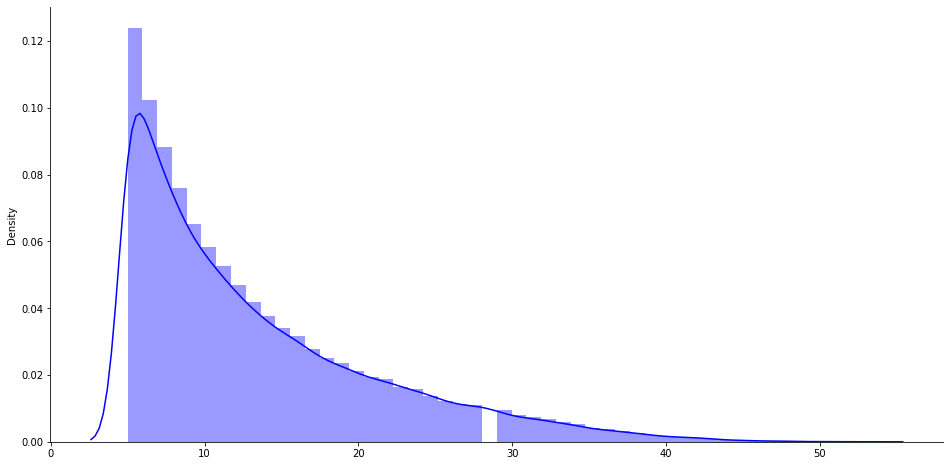

In [61]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [62]:
print("A user listens to an average of {} songs".format(np.mean(song_user)))
print("A user listens to an average of {} songs, with minimum {} and maximum {} songs".format(np.median(song_user),np.min(song_user),np.max(song_user)))


A user listens to an average of 13.1903 songs
A user listens to an average of 11.0 songs, with minimum 5 and maximum 53 songs


#**TOP 20 SONGS REPEATED**

In [63]:
print("Top 20 songs repeated")
song_df['release'].value_counts()[:20]

Top 20 songs repeated


Sehr kosmisch                                                          5043
Undo                                                                   4483
You're The One                                                         4270
Dog Days Are Over (Radio Edit)                                         3780
Revelry                                                                3672
Secrets                                                                3456
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    3272
Hey_ Soul Sister                                                       2791
Fireflies                                                              2745
Tive Sim                                                               2669
OMG                                                                    2260
Drop The World                                                         2226
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   2097
Marry Me    

#**TOP 20 FAMOUS ARTIST**


In [64]:
song_df['artist_name'].value_counts()[:20]


Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Train                      6617
The Black Keys             6507
Eminem                     6297
OneRepublic                6027
Muse                       5849
Taylor Swift               5648
Linkin Park                5623
Radiohead                  5408
The Killers                5391
Daft Punk                  5379
John Mayer                 5282
Björk                      5144
Harmonia                   5046
Metallica                  4970
Black Eyed Peas            4299
Name: artist_name, dtype: int64

#**Top 5 most popular songs and their Artists**

In [65]:
top_popular_songs = song_df.sort_values('freq')
top_popular_songs = top_popular_songs[::-1]

In [66]:
n = list(top_popular_songs['freq'])
print('Top Artist with Respect to their songs Listen frequency')
for i in range(0,5):
    print('Artist with Rank --------------------- '+ str(i+1))
    a = song_df[song_df['freq']==n[i]]
    print(str(a['artist_name']))
    print('&&')
    print(str(a['release']))
    print('*************************************************')

Top Artist with Respect to their songs Listen frequency
Artist with Rank --------------------- 1
1449167    Kilgore
Name: artist_name, dtype: object
&&
1449167    Drop The Hammer (Album Version)
Name: release, dtype: object
*************************************************
Artist with Rank --------------------- 2
838445    The Beach Boys
Name: artist_name, dtype: object
&&
838445    What Is a Young Girl Made of
Name: release, dtype: object
*************************************************
Artist with Rank --------------------- 3
471133    Ms. Dynamite / Kymani Marley
Name: artist_name, dtype: object
&&
471133    Seed Will Grow
Name: release, dtype: object
*************************************************
Artist with Rank --------------------- 4
1297745    Queen
Name: artist_name, dtype: object
&&
1297745    Somebody To Love
Name: release, dtype: object
*************************************************
Artist with Rank --------------------- 5
642730    Us3
Name: artist_name, dtype: obje

#**NEW DATAFRAME**

In [67]:
songDet=song_df.head(10000)

#**POPULARITY RECOMMENDER SYSTEM**



In [68]:
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

In [69]:
pr=popularity_recommender_py()

In [70]:
pr.create(songDet,'user_id','release')

In [71]:
pr.recommend(songDet['user_id'][5])

,user_id,release,score,Rank
7113,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,You're The One,40,1.0
6524,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo,38,2.0
5089,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Sehr kosmisch,36,3.0
4814,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry,32,4.0
1468,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Dog Days Are Over (Radio Edit),29,5.0
650,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Billionaire [feat. Bruno Mars] (Explicit Albu...,24,6.0
1581,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Drop The World,22,7.0
1934,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Fireflies,22,8.0
2581,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Horn Concerto No. 4 in E flat K495: II. Romanc...,22,9.0
4799,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Représente,20,10.0


#**Item Similarity Recommendation [Collaborative Filtering]** 

In [72]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [73]:
ir = item_similarity_recommender_py()
ir.create(songDet, 'user_id', 'release')

In [74]:
user_items = ir.get_user_items(songDet['user_id'][5])

In [75]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)
Tive Sim
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)
El Cuatrero
Unite (2009 Digital Remaster)


In [76]:
# give song recommendation for that user
ir.recommend(songDet['user_id'][5])



No. of unique songs for the user: 6
no. of unique songs in the training set: 7183
Non zero values in cooccurence_matrix :1403


,user_id,song,score,rank
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Représente,0.068740,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry,0.067948,2
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Sayonara-Nostalgia,0.066639,3
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo,0.064033,4
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Secrets,0.060982,5
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Rianna,0.052746,6
6,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Gears,0.043940,7
7,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,The Gift,0.043168,8
8,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Invalid,0.042351,9
9,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,16 Candles,0.041779,10


In [77]:
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])


no. of unique songs in the training set: 7183
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Moving To New York (album version),0.0,1
1,,Revolver [feat. Lil Wayne],0.0,2
2,,Bring Da Ruckus,0.0,3
3,,Words I Manifest (Remix) (Explicit),0.0,4
4,,The ? Remainz (Explicit),0.0,5
5,,Soliloquy Of Chaos (Explicit),0.0,6
6,,Ex-Girl To Next Girl (Explicit),0.0,7
7,,Above The Clouds (Edited),0.0,8
8,,Space Hos,0.0,9
9,,Gotta Get Over (Taking Loot) (Explicit),0.0,10


#**Content Based Recommendation**

---



##**Data Processing**

In [78]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [79]:
song_df['song_feature']=song_df['artist_name']+" "+song_df['release']

In [80]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release,song_feature
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,Cartola Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,Miguel Calo El Cuatrero


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##**Checking for Null Values**

In [82]:
print("Number of null values \n{}.".format(song_df.isnull().sum()))

Number of null values 
user_id         0
song_id         0
freq            0
track_id        0
artist_name     0
release         1
song_feature    1
dtype: int64.


In [83]:
song_df=song_df.dropna()

In [84]:
print("Number of null values \n{}.".format(song_df.isnull().sum()))

Number of null values 
user_id         0
song_id         0
freq            0
track_id        0
artist_name     0
release         0
song_feature    0
dtype: int64.


In [85]:
df=song_df.head(10000)

In [86]:
df

,user_id,song_id,freq,track_id,artist_name,release,song_feature
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,Cartola Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,Miguel Calo El Cuatrero
...,...,...,...,...,...,...,...
9995,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOCKSGZ12A58A7CA4B,2,TRQTLTB128F92F785B,Linkin Park,Bleed It Out [Live At Milton Keynes],Linkin Park Bleed It Out [Live At Milton Keynes]
9996,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOQLUTQ12A8AE48037,1,TRTEGUJ128F425B7D3,Foo Fighters,The Pretender,Foo Fighters The Pretender
9997,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOONKHS12AB018E4C6,10,TRHJNJB12903CCF029,Madonna,Revolver [feat. Lil Wayne],Madonna Revolver [feat. Lil Wayne]
9998,4e7abd655b2d28d772b20cbc912f3bdd542229d7,SOUGUKH12A8C13FBB0,3,TRLICFS128F42920C9,The Wombats,Moving To New York (album version),The Wombats Moving To New York (album version)


In [87]:
cv=CountVectorizer()
count_matrix=cv.fit_transform(df["song_feature"])

In [88]:
cosine_sim=cosine_similarity(count_matrix)
print((cosine_sim))
df.head()

[[1.         0.08333333 0.         ... 0.         0.14433757 0.15430335]
 [0.08333333 1.         0.         ... 0.         0.07216878 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.14433757 0.07216878 0.         ... 0.         1.         0.26726124]
 [0.15430335 0.         0.         ... 0.         0.26726124 1.        ]]


,user_id,song_id,freq,track_id,artist_name,release,song_feature
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,Cartola Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,Miguel Calo El Cuatrero


In [89]:
def get_title_from_index(index):
    return df[df.index==index]["release"].values[0]
def get_index_from_title(title):
    return df[df['release']==title].index[0]

In [90]:
song_user_likes="Love Me"
song_index=get_index_from_title(song_user_likes)
#print(list(enumerate(cosine_sim[movie_index])))# here enumerate functions give the tupple of the form (index, value)
similar_songs=list(enumerate(cosine_sim[song_index])) 
print(similar_songs)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.25), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.22360679774997896), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.17677669529663687), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.1889822365046136), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.25), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.25), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.1889822365046136), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0)

In [91]:
df.iloc[0]['artist_name']


'Dwight Yoakam'

In [92]:

sorted_similar_songs=sorted(similar_songs,key= lambda x:x[1],reverse=True)[1:]# here the 1st element will be the same movie 
# bcoz its correlated 100% so 1st element is left out whil sorting and the also while assigning to similar movies the seen
# movie must be dropped so [1:]is placed at the last. reverse implies descedning order. here key is a function
print(sorted_similar_songs)

[(1608, 1.0), (3051, 1.0), (4389, 1.0), (5909, 1.0), (7089, 1.0), (7112, 1.0), (7592, 0.75), (707, 0.6708203932499369), (869, 0.6708203932499369), (2122, 0.6708203932499369), (4335, 0.6708203932499369), (4400, 0.6708203932499369), (5383, 0.6708203932499369), (5464, 0.6708203932499369), (9976, 0.6708203932499369), (4136, 0.6123724356957946), (5024, 0.6123724356957946), (840, 0.5773502691896258), (3050, 0.5773502691896258), (3161, 0.5773502691896258), (4147, 0.5773502691896258), (4756, 0.5773502691896258), (5768, 0.5773502691896258), (7087, 0.5773502691896258), (7090, 0.5773502691896258), (7262, 0.5773502691896258), (7597, 0.5773502691896258), (839, 0.5), (842, 0.5), (860, 0.5), (1258, 0.5), (3926, 0.5), (5203, 0.5), (5843, 0.5), (7092, 0.5), (7599, 0.5), (8811, 0.5), (799, 0.4472135954999579), (856, 0.4472135954999579), (859, 0.4472135954999579), (3049, 0.4472135954999579), (3158, 0.4472135954999579), (3159, 0.4472135954999579), (3206, 0.4472135954999579), (4128, 0.4472135954999579), (4

In [93]:
i=0
prev=""
print("top similar songs to "+song_user_likes+" are :\n")
for ele in sorted_similar_songs:
    key=get_title_from_index(ele[0])
    if key!=prev and i!=0:
      print(key)
    i=i+1
    if i>20:
        break
    prev=key    

top similar songs to Love Me are :

Runaway Love
Somebody To Love
That Should Be Me
U Smile
Up


#**User Based Collaborative Filtering**

In [94]:

song_df2=pd.DataFrame(song_df.sample(20000))
song_df2

,user_id,song_id,freq,track_id,artist_name,release,song_feature
1395673,9f3f32dd79baed968be68840d8d09c46f6044e21,SOFRZBI12A8C145A85,1,TRMCKFW128F92EC21C,Amon Amarth,North Sea Storm (Live),Amon Amarth North Sea Storm (Live)
268991,4a639511296e5150ac76048f2ae3ab91e80d177f,SOSYDSS12A58A78C17,1,TRONGMR128F14AE0F9,Newsboys,Love_ Liberty_ Disco (Love Liberty Disco Album...,Newsboys Love_ Liberty_ Disco (Love Liberty Di...
970206,dba4d83f01693744a6355c5f7a4808ccc67f3388,SONPLUD12A8C13BF4B,9,TRVCGZK128F4296177,Postal Service,Clark Gable (Album),Postal Service Clark Gable (Album)
1187571,62ddb70999e8f047436702531996cff9afc4123d,SOHUAVJ12A6D4F942B,2,TRQPALH128EF34E56F,Horkyze Slyze,Rnb soul,Horkyze Slyze Rnb soul
23310,76f6ff010bf5b971da422258ec769b6c8dea73de,SOKPVYT12AB018E5E6,1,TRDTSRZ12903CE86A9,Ester Drang,Valencia's Dying Dream,Ester Drang Valencia's Dying Dream
...,...,...,...,...,...,...,...
208816,eecaba198aabcdac85be86929371e881a9b1ac0a,SOHKDXW12A6D4F7B7F,2,TRPYHNX128F1458C6C,Bad Brains,How Low Can A Punk Get (1991 Digital Remaster),Bad Brains How Low Can A Punk Get (1991 Digita...
514427,9430af0c65a85e5096ec3aa533b9f5c7b1774f93,SOMXOYT12A8AE46E10,1,TRYXNQY128F423AAF7,Belle and Sebastian,Piazza_ New York Catcher,Belle and Sebastian Piazza_ New York Catcher
1071594,b14c52a4cec03cc8cbe22e39d9a8f17d03422fc3,SOPIBLV12A8C136C2A,1,TRBBYVD128F931AE0C,Tom Petty And The Heartbreakers,Breakdown (Album Version),Tom Petty And The Heartbreakers Breakdown (Alb...
1112423,25d58196f3c284838c967b097b9e5b7873fbd10d,SOQKCPN12A8C13643C,2,TRSEOMD128F425CDEA,Suzi Quatro,Sometimes Love Is Letting Go,Suzi Quatro Sometimes Love Is Letting Go


In [95]:
def rating(cols):
    f=cols[0]
    if f==1:
      return 0.5
    elif f>1 and f<=2:
      return 1
    elif f>2 and f<=5:
      return 1.5
    elif f>5 and f<=7:
      return 2
    elif f>7 and f<=10:
      return 2.5
    elif f>10 and f<=12:
      return 3
    elif f>12 and f<=15:
      return 3.5
    elif f>15 and f<=17:
      return 4
    elif f>17 and f<=20:
      return 4.5                   
    else:
        return 5

In [96]:
song_df2['rating']=song_df2[['freq']].apply(rating,axis=1)


In [97]:
song_df2['rating'].value_counts()

0.5    11627
1.5     3078
1.0     2906
2.0      719
2.5      605
5.0      372
3.5      249
3.0      223
4.0      112
4.5      109
Name: rating, dtype: int64

In [98]:
song_df22=song_df2[song_df2['rating']==0.5]
song_df22s=pd.DataFrame(song_df22.sample(2000))

In [99]:
song_df21=song_df2[song_df2['rating']!=0.5]

In [100]:
fres= pd.concat([song_df22s, song_df21], axis=0)


In [101]:
fres

,user_id,song_id,freq,track_id,artist_name,release,song_feature,rating
213273,dc5d18118a64379cd52e749aadd5adb4b00c004e,SOIVTIS12AB018757B,1,TRKQOVW128F9327334,Apocalyptica,Farewell,Apocalyptica Farewell,0.5
240884,4f356fae175795e564075e09743e5db96c229aab,SOSZIDW12A8BEEEEA2,1,TRBYTZB128F4260589,SWV,I'm So Into You,SWV I'm So Into You,0.5
168793,6212141be33d2eeb7ed2d8009da8f69d404e4792,SOTLTXQ12AB0182257,1,TROAQFL128F930F4B9,Camera Obscura,Honey In The Sun,Camera Obscura Honey In The Sun,0.5
899163,2b15d0a0aa6b59d98fd0f612bdc42f1238d7e94a,SOPVFGE12A58A7BD2D,1,TRUTDXU128F425D526,John Mayer,Say,John Mayer Say,0.5
1205813,aa36947e5792fbee7ff48271621166cf8fd93d01,SOHLNXK12AB01852AF,1,TRDVOEO12903CBDF55,Simple Plan,Your Love Is A Lie,Simple Plan Your Love Is A Lie,0.5
...,...,...,...,...,...,...,...,...
958709,42eeb51857b5baf15a574db3497a9b6b70a616c6,SOBHWHZ12AF72A409D,21,TROWFAC12903CA9250,Camila,Perderte De Nuevo,Camila Perderte De Nuevo,5.0
487089,d97dd517b40d3f7aa9a15a7e2ab816e42a20cee1,SOEIBBE12A58A7C909,2,TRYDSUV128F42BA599,Björk,Army of Me,Björk Army of Me,1.0
960894,047ba2d22f3bdc39352631f0c4c36e48c02090f2,SORWKGX12AB01835BF,12,TRQWXZE128F931A7FC,Lisa Papineau,Marco Chomo,Lisa Papineau Marco Chomo,3.0
208816,eecaba198aabcdac85be86929371e881a9b1ac0a,SOHKDXW12A6D4F7B7F,2,TRPYHNX128F1458C6C,Bad Brains,How Low Can A Punk Get (1991 Digital Remaster),Bad Brains How Low Can A Punk Get (1991 Digita...,1.0


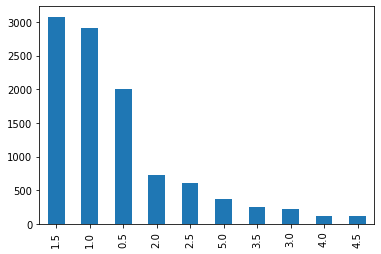

In [102]:
fres.rating.value_counts().plot(kind='bar')
plt.show()

In [103]:
fres.tail(10)

,user_id,song_id,freq,track_id,artist_name,release,song_feature,rating
1102042,b8e71f6ac5c1a42e87e028da4b22cda6e054555e,SOCREZF12AB018A2E1,3,TRQSAAU12903CE0DAB,Foghat,HOME IN MY HAND,Foghat HOME IN MY HAND,1.5
348179,eeb713d5e31382b1e8b328748d05d1e3e8cd9e1f,SOIPYPB12A8C1360D4,146,TRWVOJJ12903CCC654,Evanescence,My Immortal (Album Version),Evanescence My Immortal (Album Version),5.0
453754,b2b108558318a3c322710c48f62200300bab5591,SONVXGH12A8C13B683,5,TRSEFCM128F429354D,Xavier Rudd,Set It Up,Xavier Rudd Set It Up,1.5
548637,d372fab172554750f212915b7a63f311efdcc59e,SOBXHDL12A81C204C0,2,TRHNCIR128F42334A5,Kanye West,Stronger,Kanye West Stronger,1.0
227015,c5bb2cdb93b9c739189753de2e4e6626390f5fe4,SOKJNVH12A67AE0DF8,5,TRQTOFR128EF343187,Apocalyptica,Cohkka,Apocalyptica Cohkka,1.5
958709,42eeb51857b5baf15a574db3497a9b6b70a616c6,SOBHWHZ12AF72A409D,21,TROWFAC12903CA9250,Camila,Perderte De Nuevo,Camila Perderte De Nuevo,5.0
487089,d97dd517b40d3f7aa9a15a7e2ab816e42a20cee1,SOEIBBE12A58A7C909,2,TRYDSUV128F42BA599,Björk,Army of Me,Björk Army of Me,1.0
960894,047ba2d22f3bdc39352631f0c4c36e48c02090f2,SORWKGX12AB01835BF,12,TRQWXZE128F931A7FC,Lisa Papineau,Marco Chomo,Lisa Papineau Marco Chomo,3.0
208816,eecaba198aabcdac85be86929371e881a9b1ac0a,SOHKDXW12A6D4F7B7F,2,TRPYHNX128F1458C6C,Bad Brains,How Low Can A Punk Get (1991 Digital Remaster),Bad Brains How Low Can A Punk Get (1991 Digita...,1.0
1112423,25d58196f3c284838c967b097b9e5b7873fbd10d,SOQKCPN12A8C13643C,2,TRSEOMD128F425CDEA,Suzi Quatro,Sometimes Love Is Letting Go,Suzi Quatro Sometimes Love Is Letting Go,1.0


In [104]:
# fres.to_csv('rating.csv')

In [105]:
nsong_df2=fres[['user_id','release','rating']]
nn=nsong_df2.copy()

In [106]:
ratings_reorder=nsong_df2.reindex(columns=["user_id","rating","release"])


In [138]:
ratings_reorder.head()

,user_id,rating,release
213273,dc5d18118a64379cd52e749aadd5adb4b00c004e,0.5,Farewell
240884,4f356fae175795e564075e09743e5db96c229aab,0.5,I'm So Into You
168793,6212141be33d2eeb7ed2d8009da8f69d404e4792,0.5,Honey In The Sun
899163,2b15d0a0aa6b59d98fd0f612bdc42f1238d7e94a,0.5,Say
1205813,aa36947e5792fbee7ff48271621166cf8fd93d01,0.5,Your Love Is A Lie


In [107]:
# nsong_df2.to_csv('ratings2.csv')

In [108]:
nn=nn.set_index(nn.columns[0])


In [109]:
# nn.to_csv('ratings3.csv',header=False)

In [110]:
# ratings_reorder.to_csv('ratings.csv',header=False)

In [111]:
# from csv2tsv import to_tsv
# to_tsv('ratings.csv')

In [112]:
print('Number of ratings: %d\nNumber of tracks: %d\nNumber of users: %d' % (len(nsong_df2), len(nsong_df2['release'].unique()), len(nsong_df2['user_id'].unique())))

Number of ratings: 10373
Number of tracks: 7225
Number of users: 9696


In [113]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(nsong_df2[['user_id', 'release', 'rating']], reader)

In [114]:

model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.035165
test_mae     0.710641
fit_time     0.413280
test_time    0.029158
dtype: float64

In [115]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    1.042358
test_mae     0.704745
fit_time     1.132328
test_time    0.026381
dtype: float64

In [116]:
param_grid = {'n_factors': [40,80,100,120],
              'n_epochs': [10, 20,30,40],
              'lr_all': [0.002, 0.003,0.005,0.007,0.004,0.001],
              'reg_all': [0.2, 0.3,0.4,0.5, 0.6,0.3]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0355283379987188
{'n_factors': 120, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [117]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=100, n_epochs=30, lr_all=0.003, reg_all=0.4)
model.fit(trainset)
predictions = model.test(testset)

In [118]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'release', 'actual_rating', 'pred_rating', 'details'])

df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(20)

,user_id,release,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
1425,b9125e1e0c6a7628f14b4435c5a0bd7e2a7eb7d5,Magic,0.5,1.525273,False,2.0,1.025273
154,f211a272854558f6e924348e741d04d719a54389,Power (Album Version),1.5,1.460273,False,1.0,0.039727
1409,836b790e90b23bb95ff6e21f23d2f4e89e49816c,What's The Frequency_ Kenneth? (Radio Version),2.5,1.435770,False,1.0,1.064230
1952,e67d3c30954b7460dd9664720b01da2934874027,The Unforgiven III,1.0,1.521511,False,2.0,0.521511
2046,a4d60109ba6c6b13ef4b28cb6aec2318e9ca1525,Brother,1.0,1.529369,False,2.0,0.529369
747,da4721fdf8a0c813b7e4f064c91ff18b69137c60,Wake Up Alone,0.5,1.521511,False,2.0,1.021511
1207,23bb8075d5c92945ffdeb5524fabd3d09d4c013c,El Colmo,0.5,1.521511,False,2.0,1.021511
1451,d1fde6c33a1a1c3a16aaed64577fcc7ccf336a57,Bonfires,1.0,1.521511,False,2.0,0.521511
1568,240dbe200806295c46de9b49f1b552b3f8460d5f,The Collector,0.5,1.521511,False,2.0,1.021511
511,f908d63ec309b7d2b9107d48763066c24d73b0b0,Invalid,2.0,1.623809,False,2.0,0.376191


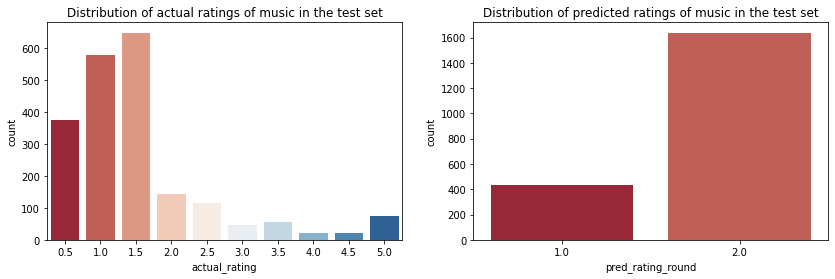

In [119]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of music in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of music in the test set')

plt.show()

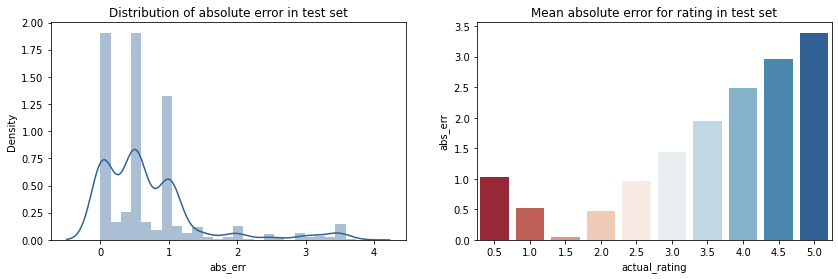

In [120]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

**In User Based Collaborative Filtering, based on music, its rating is predicted and recommended to the user**

#**USER BASED CF**

In [121]:

# reader = Reader(line_format='user item rating', sep=',')

# # Load the data from the file using the reader format
# data = Dataset.load_from_file('ratings3.csv', reader=reader)

# # Show first entries
# print('{:>8} {:>8} {:>8}'.format('user_id', 'item_id', 'rating'))
# for index, item in enumerate(data.raw_ratings):
#   print(' {:>8} {:>8} {:>8}'.format(*item))
#   if index > 5:
#     break

 user_id  item_id   rating
 7a02b607f40ca5526267937e6c1318e15bdef73b   I'm Me      0.5
 5860dfc95cd7489923da325fb89b36bc80337e7a Miénteme      0.5
 26aa7ed9b76d4e6b053d84e709d1150d5da40daf Lonesome Loser      0.5
 63516bd07fd9fcdbbab486c70159ab4cba75bcd5 Don't You Forget It      0.5
 68ace282375b52374834bf0988c99ec01f0ac5a3 Let's Get It On      0.5
 41cfc343689c671a9c5daf8c5b6b721e5ca28f37 Morgenrot (Live)      0.5
 b3684f1b40b6c0270c68b94e0768e210e3d916c9 Me & Mr Jones      0.5


In [122]:
# from surprise import Dataset, Reader, KNNBasic
# from surprise.model_selection import cross_validate, split

In [173]:
# sim_options = {
#     'name': 'pearson_baseline',
#     'user_based': True
# }

# # Fit to trainset.
# algo = KNNBasic(sim_options=sim_options)
# trainset = data.build_full_trainset()
# algo.fit(trainset)

# # Predict the rating for a specific (user, item) pair.
# # Note that we know the actual rating.
# uid = str('371835390354ff0d65cf2f04ca6cb54e08488670')
# itemid = str('Miénteme')
# actual_rating = 0.5
# algo.predict(uid=uid, iid=itemid, r_ui=actual_rating, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 371835390354ff0d65cf2f04ca6cb54e08488670 item: Miénteme   r_ui = 0.50   est = 1.50   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='371835390354ff0d65cf2f04ca6cb54e08488670', iid='Miénteme', r_ui=0.5, est=1.4988056564112364, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [124]:

# kf = split.KFold(random_state=0, n_splits=5)
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=kf, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9848  1.0297  1.0086  1.0097  0.9891  1.0044  0.0161  
MAE (testset)     0.6529  0.6722  0.6735  0.6816  0.6562  0.6673  0.0109  
Fit time          1.14    1.16    1.13    1.14    1.15    1.15    0.01    
Test time         0.01    0.02    0.02    0.02    0.01  

{'fit_time': (1.1446094512939453,
  1.1572577953338623,
  1.1333460807800293,
  1.13966965675354,
  1.151366949081421),
 'test_mae': array([0.65292014, 0.67222017, 0.67347041, 0.68159792, 0.65615866]),
 'test_rmse': array([0.98484657, 1.02969188, 1.00862106, 1.00969762, 0.98905071]),
 'test_time': (0.013698101043701172,
  0.016373395919799805,
  0.016008853912353516,
  0.01611328125,
  0.014512777328491211)}